<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/KnnClassifier/SocialNetworkAdsKNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d rakeshrau/social-network-ads

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 6.31MB/s]


In [7]:
! unzip social-network-ads.zip

Archive:  social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [8]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv("Social_Network_Ads.csv")

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
X, y = [df.iloc[:, 2:4], df.iloc[:,-1]]

In [12]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
X.shape

(400, 2)

In [14]:
y.shape

(400,)

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [16]:
X.isna().values.any()

False

In [17]:
y.isna().values.any()

False

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train.shape

(320, 2)

In [20]:
X_test.shape

(80, 2)

<h1>Scaling values to same scale</h1>
<br>
<p>Since there is very large difference in scales of age and salary, we need to apply normalize it</p>

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train[:5]

array([[ 0.13204277,  1.91876095],
       [ 0.79373361, -1.22601927],
       [-0.90775712, -1.10734832],
       [-1.09681165, -0.51399356],
       [ 0.98278813, -1.16668379]])

In [24]:
X_test = scaler.transform(X_test)

In [25]:
len(X_test)

80

In [26]:
import math

In [27]:
# k using method 1
k = np.sqrt(len(X_train))

In [28]:
if round(k)%2==0:
  k = round(k)-1
else:
  k = round(k)

In [29]:
k

17

<h1>Importing KNN classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k)

In [31]:
#Training our model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [32]:
y_pred = knn.predict(X_test)

In [33]:
y_pred.shape

(80,)

In [34]:
y_test.shape

(80,)

In [35]:
#checking accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 4, 24]])

In [37]:
# calculating k on basis of trial and error

In [38]:
accuracy = []
for i in range(1, 26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  accuracy.append([accuracy_score(y_test, knn.predict(X_test)), f'k = {i}'])

In [39]:
accuracy

[[0.8125, 'k = 1'],
 [0.8125, 'k = 2'],
 [0.85, 'k = 3'],
 [0.875, 'k = 4'],
 [0.875, 'k = 5'],
 [0.8875, 'k = 6'],
 [0.8875, 'k = 7'],
 [0.875, 'k = 8'],
 [0.8875, 'k = 9'],
 [0.875, 'k = 10'],
 [0.9, 'k = 11'],
 [0.9, 'k = 12'],
 [0.9, 'k = 13'],
 [0.9, 'k = 14'],
 [0.9, 'k = 15'],
 [0.9, 'k = 16'],
 [0.9, 'k = 17'],
 [0.9, 'k = 18'],
 [0.9, 'k = 19'],
 [0.8875, 'k = 20'],
 [0.8875, 'k = 21'],
 [0.875, 'k = 22'],
 [0.8875, 'k = 23'],
 [0.8875, 'k = 24'],
 [0.8875, 'k = 25']]

In [40]:
type(accuracy[0][0])

numpy.float64

In [41]:
accuracy[0][0]<10

True

In [42]:
len(accuracy)

25

In [43]:
for i in accuracy:
  print(i[0])

0.8125
0.8125
0.85
0.875
0.875
0.8875
0.8875
0.875
0.8875
0.875
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.8875
0.8875
0.875
0.8875
0.8875
0.8875


In [50]:
allmax = [[0]]
for i in accuracy:
  if allmax[0][0]<i[0]:
    allmax = [i]
  elif allmax[0][0] == i[0]:
    allmax.append(i)
  else:
    pass
allmax

[[0.9, 'k = 11'],
 [0.9, 'k = 12'],
 [0.9, 'k = 13'],
 [0.9, 'k = 14'],
 [0.9, 'k = 15'],
 [0.9, 'k = 16'],
 [0.9, 'k = 17'],
 [0.9, 'k = 18'],
 [0.9, 'k = 19']]

In [51]:
max = allmax[math.floor(len(allmax)/2)]
max

[0.9, 'k = 15']

In [52]:
import matplotlib.pyplot as plt

accuracy_numbers = [i[0] for i in accuracy]

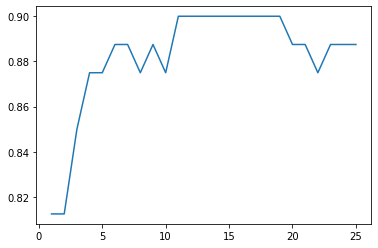

In [53]:
plt.plot(range(1, 26), accuracy_numbers)

In [54]:
finalK = int(max[1].split()[2])

In [55]:
finalK

15

In [56]:
knnFinal = KNeighborsClassifier(n_neighbors = finalK)

In [57]:
knnFinal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [58]:
accuracy_score(y_test, knnFinal.predict(X_test))

0.9

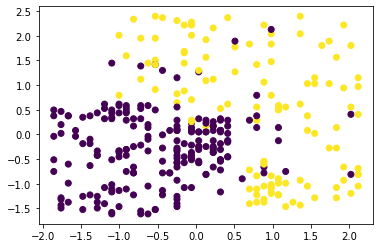

In [59]:
plt.scatter(x = [i[0] for i in X_train], y = [i[1] for i in X_train], c=y_train)


In [60]:
def predict_output():
  age = int(input("Enter the age"))
  salary = int(input("Enter the salary"))

  data =  np.array([[age, salary]])
  dataNew = scaler.transform(data)
  return "Yes" if knnFinal.predict(dataNew) else "NO"

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
predict_output()

Enter the age50
Enter the salary100000


'Yes'

1#1. Decision Boundary for Knn.
##1. What is Decision Boundary.


<img src = "https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png" width=600, height=400></img>


#2. <a href = "https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration">Vornoi Diagram</a>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/800px-Euclidean_Voronoi_diagram.svg.png" width=600, height=400></img>

#3. <a href="https://en.wikipedia.org/wiki/Delaunay_triangulation">Delone Triangulation</a>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Delaunay_circumcircles_vectorial.svg/800px-Delaunay_circumcircles_vectorial.svg.png" width=380, height=380></img>

# 4. Steps to plot Decision Boudary for Knn(Assuming 2 input cols)
1. Train the classifier on the training set.
2. Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.
3. Classify each point on the grid. Store the results in an Array A, where A<sub>ij</sub> contains the predicted class for the point at row i, column j on the grid.
4. Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.
5. Finally print out training data with their respective color on the same contour.

#Step 1: we have already trained the classifier so step 1 is taken care of.

##Step 2. Creating a Meshgrid

<img src ="https://i.stack.imgur.com/8Mbig.png"></img>

In [63]:
# a sample meshgrid

xm = np.array([1, 2, 3])
ym = np.array([4, 5, 6, 7])

XX, YY = np.meshgrid(xm, ym)

##Purpose of Meshgrid
###Meshgrid is very important to evaluate functions on a grid. We can apply any funtion to the points of a meshgrid to plot a function.

##Plotting a function using Meshgrid

In [64]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:, 0].max() + 1, step=0.01)

In [65]:
a.shape

(598,)

In [66]:
b = np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max()+1, step=0.01)
b.shape

(601,)

In [67]:
XX, YY = np.meshgrid(a, b)

In [68]:
XX.shape

(601, 598)

In [69]:
YY.shape

(601, 598)

##Step 3: Classifiying every point on the meshgrid

In [70]:
YY.shape[0]*YY.shape[1]
# we have got this much customers
# XX contains age of these customers
# YY contains salary of these customers

359398

In [71]:
# now we want to feed values of all these cusomers into knn algo
# age value of first customer is 
XX[0][0]

-2.85302974763254

In [72]:
# this is salary of first customer
YY[0][0]

-2.6116998600993697

In [73]:
knnFinal.predict(np.array([XX[0][0], YY[0][0]]).reshape(1, 2))

array([0])

In [74]:
## above we predicted for first customer, we will have to do the same for all 601*602 customers
allData = np.array([XX.ravel(), YY.ravel()]).T

In [75]:
allData.shape

(359398, 2)

In [76]:
newPredictions = knnFinal.predict(allData)

In [77]:
newPredictions

array([0, 0, 0, ..., 1, 1, 1])

In [78]:
newPredictions.shape

(359398,)

##Step 4: Plotting the array as an image

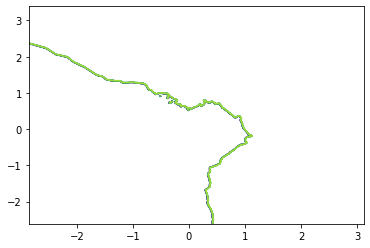

In [81]:
plt.contour(XX, YY, newPredictions.reshape(XX.shape))

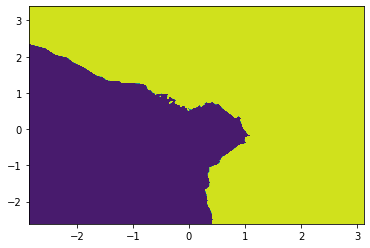

In [79]:
plt.contourf(XX, YY, newPredictions.reshape(XX.shape))

##Step 5: Plotting all the training data on the plot

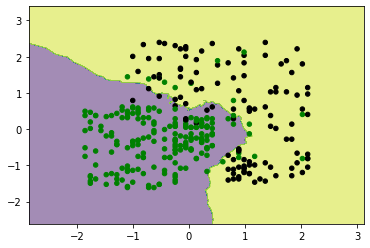

In [80]:
plt.contourf(XX, YY, newPredictions.reshape(XX.shape), alpha = 0.5)
colormap = np.array(["green", "Black"])
plt.scatter(X_train[:,0], X_train[:,1], c=colormap[y_train], s=20)
plt.show()

##Effect of K on Training Error rate and Validation Error rate

In [89]:
error_train = []
error_test = []

for i in range(1, 26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  x=confusion_matrix(y_train, knn.predict(X_train))
  y=confusion_matrix(y_test, knn.predict(X_test))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/y.sum())

In [90]:
len(error_test)

25

In [91]:
len(error_train)

25

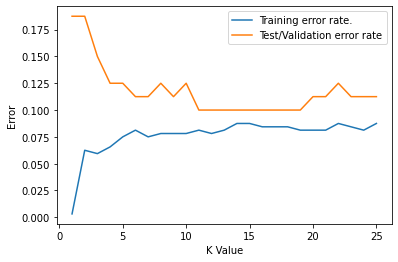

In [92]:
plt.plot(range(1, 26), error_train, label = "Training error rate.")
plt.plot(range(1, 26), error_test, label="Test/Validation error rate")
plt.xlabel("K Value")
plt.ylabel("Error")
plt.legend()

##Conclusion
1. For smaller values of K(=1) the model generally overfits and show high Variance.
2. For higher values of k(=n, where n is the no. of rows in training set), hte model underfits and shows High Bias.
3. As we increase the value of K the smoothness of Decision Boundary increases.
